In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28*28).astype('float32') / 255.0
x_train = tf.convert_to_tensor(x_train)

In [44]:
learning_rate = [1.0, 0.1, 0.01, 0.001]

all_accuracy = []
all_loss = []
all_validate = []

for lr in learning_rate:
    inputs = keras.Input(shape=(28*28,))
    x = layers.Dense(256, activation='relu')(inputs)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
        optimizer=keras.optimizers.SGD(learning_rate=lr), #learning rate
        metrics=['accuracy']
    )

    accuracy = []
    loss = []
    validation = []

    for i in range(20):
        model.fit(x_train, y_train, batch_size=50, epochs=1, verbose=0)
        _, a = model.evaluate(x_train, y_train, verbose=0)
        l, v = model.evaluate(x_test, y_test, verbose=0)
        accuracy.append(a)
        loss.append(l)
        validation.append(v)
    
    all_accuracy.append(accuracy)
    all_loss.append(loss)
    all_validate.append(validation)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\2919101891.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


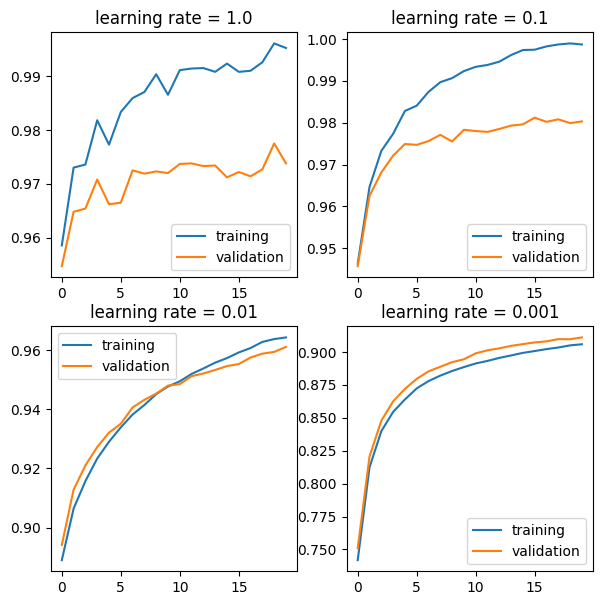

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(7,7))
for z in range(4):
    i = z // 2
    j = z % 2
    ax[i][j].plot(all_accuracy[z], label='training')
    ax[i][j].plot(all_validate[z], label='validation')
    ax[i][j].set_title(f'learning rate = {learning_rate[z]}')
    ax[i][j].legend()

fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\1376747942.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


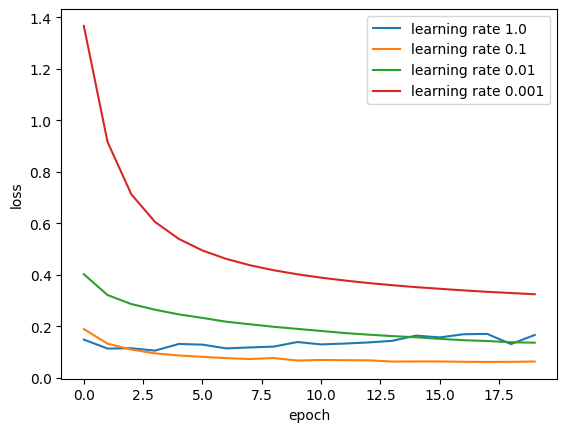

In [46]:
fig, ax = plt.subplots()
for z in range(4):
    ax.plot(all_loss[z], label = f"learning rate {learning_rate[z]}")

ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend()
fig.show()

In [11]:
batch_sizes = [8, 32, 256]

all_accuracy = []
all_loss = []
all_validate = []

for bs in batch_sizes:
    inputs = keras.Input(shape=(28*28,))
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
        optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
        metrics=['accuracy']
    )

    accuracy = []
    loss = []
    validation = []

    for i in range(20):
        model.fit(x_train, y_train, batch_size=bs, epochs=1, verbose=0)
        _, a = model.evaluate(x_train, y_train, verbose=0)
        l, v = model.evaluate(x_test, y_test, verbose=0)
        accuracy.append(a)
        loss.append(l)
        validation.append(v)
    
    all_accuracy.append(accuracy)
    all_loss.append(loss)
    all_validate.append(validation)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\1124704518.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


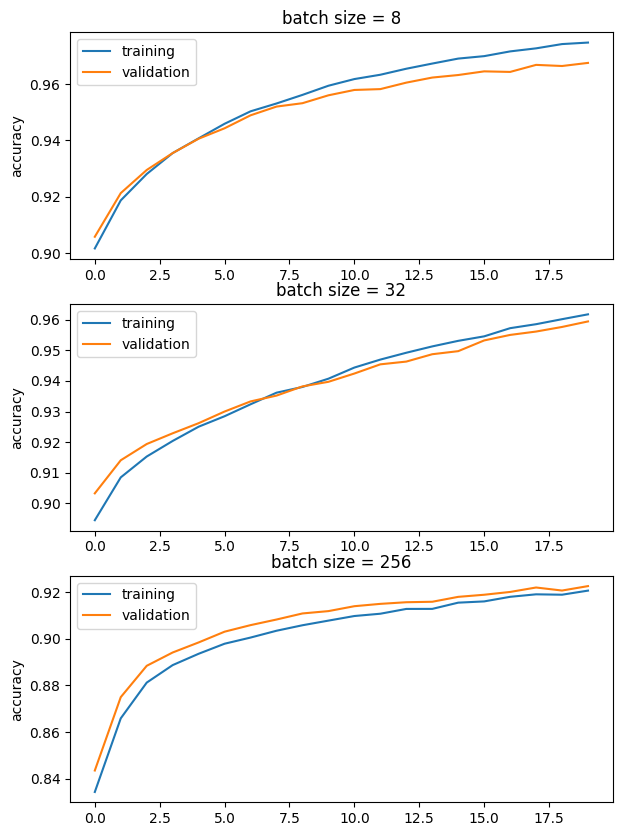

In [29]:
fig, ax = plt.subplots(3, figsize=(7,10))
for z in range(3):
    ax[z].plot(all_accuracy[z], label='training')
    ax[z].plot(all_validate[z], label='validation')
    ax[z].set_title(f'batch size = {batch_sizes[z]}')
    ax[z].legend()
    ax[z].set_ylabel('accuracy')

fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\2059421831.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


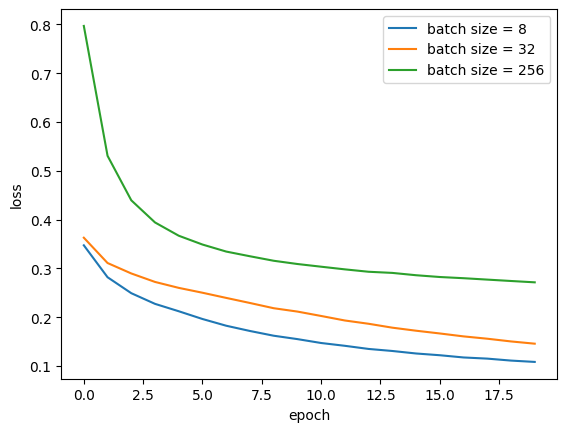

In [28]:
fig, ax = plt.subplots()
for z in range(3):
    ax.plot(all_loss[z], label = f"batch size = {batch_sizes[z]}")

ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()
fig.show()

In [18]:
activate = ['relu', 'tanh', 'sigmoid']

all_accuracy = []
all_loss = []
all_validate = []

for act in activate:
    inputs = keras.Input(shape=(28*28,))
    x = layers.Dense(256, activation=act)(inputs)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
        optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
        metrics=['accuracy']
    )

    accuracy = []
    loss = []
    validation = []

    for i in range(20):
        model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0)
        _, a = model.evaluate(x_train, y_train, verbose=0)
        l, v = model.evaluate(x_test, y_test, verbose=0)
        accuracy.append(a)
        loss.append(l)
        validation.append(v)
    
    all_accuracy.append(accuracy)
    all_loss.append(loss)
    all_validate.append(validation)
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\1961547911.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


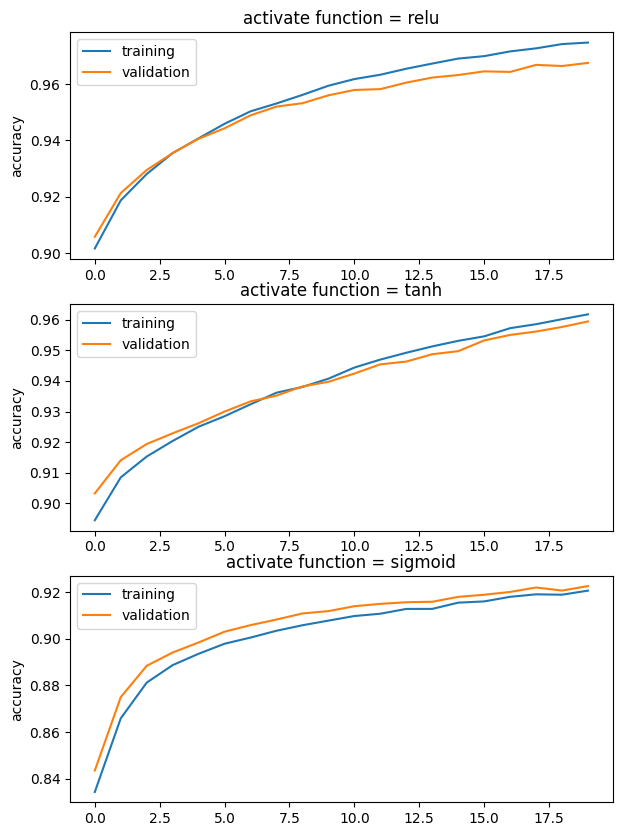

In [27]:
fig, ax = plt.subplots(3, figsize=(7,10))
for z in range(3):
    ax[z].plot(all_accuracy[z], label='training')
    ax[z].plot(all_validate[z], label='validation')
    ax[z].set_title(f'activate function = {activate[z]}')
    ax[z].legend()
    ax[z].set_ylabel('accuracy')
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\3746330031.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


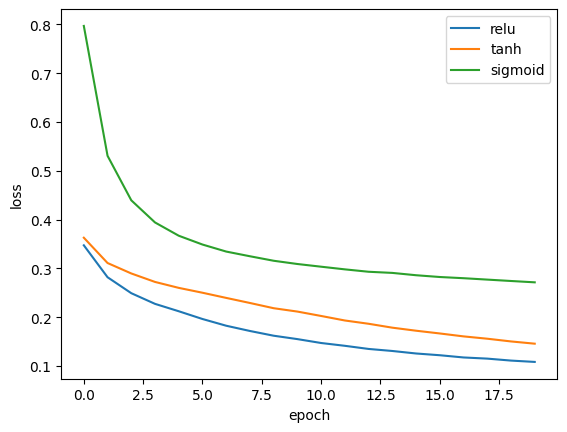

In [25]:
fig, ax = plt.subplots()
for z in range(3):
    ax.plot(all_loss[z], label = f"{activate[z]}")

ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend()
fig.show()

In [30]:
all_accuracy = []
all_loss = []
all_validate = []

inputs = keras.Input(shape=(28*28,))
outputs = layers.Dense(10, activation='softmax')(inputs)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
    optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
    metrics=['accuracy']
)

accuracy = []
loss = []
validation = []

for i in range(20):
    model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0)
    _, a = model.evaluate(x_train, y_train, verbose=0)
    l, v = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(a)
    loss.append(l)
    validation.append(v)

all_accuracy.append(accuracy)
all_loss.append(loss)
all_validate.append(validation)
    

In [31]:

inputs = keras.Input(shape=(28*28,))
x = layers.Dense(256, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
    optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
    metrics=['accuracy']
)

accuracy = []
loss = []
validation = []

for i in range(20):
    model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0)
    _, a = model.evaluate(x_train, y_train, verbose=0)
    l, v = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(a)
    loss.append(l)
    validation.append(v)

all_accuracy.append(accuracy)
all_loss.append(loss)
all_validate.append(validation)

In [32]:
inputs = keras.Input(shape=(28*28,))
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
    optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
    metrics=['accuracy']
)

accuracy = []
loss = []
validation = []

for i in range(20):
    model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0)
    _, a = model.evaluate(x_train, y_train, verbose=0)
    l, v = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(a)
    loss.append(l)
    validation.append(v)

all_accuracy.append(accuracy)
all_loss.append(loss)
all_validate.append(validation)

In [34]:
inputs = keras.Input(shape=(28*28,))
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
    optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
    metrics=['accuracy']
)

accuracy = []
loss = []
validation = []

for i in range(20):
    model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0)
    _, a = model.evaluate(x_train, y_train, verbose=0)
    l, v = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(a)
    loss.append(l)
    validation.append(v)

all_accuracy.append(accuracy)
all_loss.append(loss)
all_validate.append(validation)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\2185126396.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


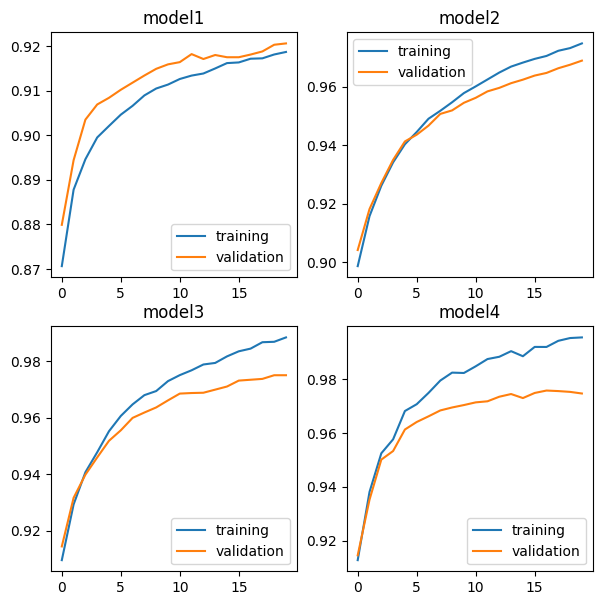

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(7,7))
for z in range(4):
    i = z // 2
    j = z % 2
    ax[i][j].plot(all_accuracy[z], label='training')
    ax[i][j].plot(all_validate[z], label='validation')
    ax[i][j].set_title(f'model{z+1}')
    ax[i][j].legend()

fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\1734525479.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


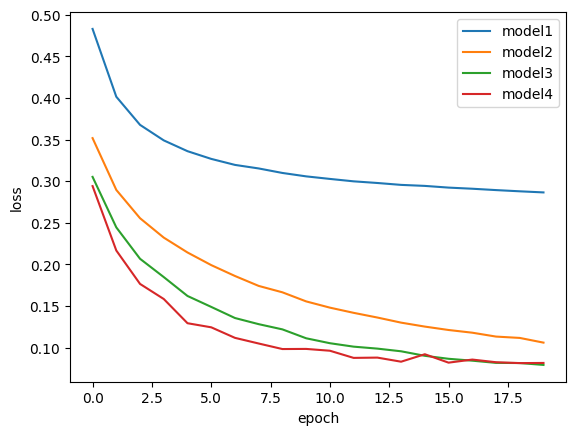

In [36]:
fig, ax = plt.subplots()
for z in range(4):
    ax.plot(all_loss[z], label = f"model{z+1}")

ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend()
fig.show()

In [39]:
epochs = [10, 20, 40, 80]

all_accuracy = []
all_loss = []
all_validate = []

for epoch in epochs:
    inputs = keras.Input(shape=(28*28,))
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #loss function
        optimizer=keras.optimizers.SGD(learning_rate=0.01), #learning rate
        metrics=['accuracy']
    )

    accuracy = []
    loss = []
    validation = []


    for i in range(epoch):
        model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=0)
        _, a = model.evaluate(x_train, y_train, verbose=0)
        l, v = model.evaluate(x_test, y_test, verbose=0)
        accuracy.append(a)
        loss.append(l)
        validation.append(v)

    all_accuracy.append(accuracy)
    all_loss.append(loss)
    all_validate.append(validation)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\3110615326.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


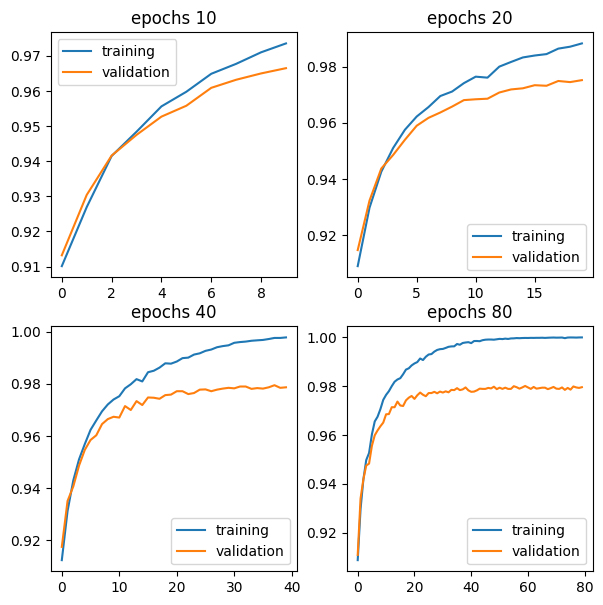

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(7,7))
for z in range(4):
    i = z // 2
    j = z % 2
    ax[i][j].plot(all_accuracy[z], label='training')
    ax[i][j].plot(all_validate[z], label='validation')
    ax[i][j].set_title(f'epochs {epochs[z]}')
    ax[i][j].legend()

fig.show()